## Загрузка датасета из github из папки Andrey_Sovtsov

In [9]:
import os
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from datetime import datetime


In [12]:
git_path = 'https://github.com/terrainternship/Cardiocenter_n3/raw/main/Andrey_Sovtsov/dataset_wide_birthday.xlsx'
filename = os.path.basename(git_path)

!wget {git_path}

df = pd.read_excel(filename, decimal=",")
df.head()

--2023-09-06 14:08:59--  https://github.com/terrainternship/Cardiocenter_n3/raw/main/Andrey_Sovtsov/dataset_wide_birthday.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/terrainternship/Cardiocenter_n3/main/Andrey_Sovtsov/dataset_wide_birthday.xlsx [following]
--2023-09-06 14:09:00--  https://raw.githubusercontent.com/terrainternship/Cardiocenter_n3/main/Andrey_Sovtsov/dataset_wide_birthday.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274516 (268K) [application/octet-stream]
Saving to: ‘dataset_wide_birthday.xlsx’

dataset_wide_birthd 100%[===================>] 268.08K  --.-KB/s    

,institution,id,gender,age,dose,date_analyse,prev_INR(MHO),atrial_fibrillation,mitral_valve,aortal_valve,...,d6,d7,d8,deviation_from_median,age_percentile,age_quantile,is_elderly,age_density,age_zscore,birthdate
0,ГБУЗ РБ Толбазинская ЦРБ,140361892057136,0,57,7.50,2022-11-11,3.11,1,0,0,...,0,0,0,-10,13.602187,1,0,0.017956,-0.919637,1965-11-11
1,ГБУЗ РБ Толбазинская ЦРБ,140361892057136,0,57,7.50,2022-11-24,3.32,1,0,0,...,0,0,0,-10,13.602187,1,0,0.017956,-0.919637,1965-11-11
2,ГБУЗ РБ Толбазинская ЦРБ,140361892057264,1,50,5.00,2022-11-22,2.01,0,1,0,...,0,1,0,-17,5.502392,1,0,0.007255,-1.606331,1972-11-22
3,ГБУЗ РБ Толбазинская ЦРБ,140361892057392,0,53,6.25,2022-11-21,1.42,1,0,0,...,0,0,0,-14,8.168148,1,0,0.010555,-1.312034,1969-11-21
4,ГБУЗ РБ Толбазинская ЦРБ,140361892057392,0,53,6.25,2022-12-06,2.56,1,0,0,...,0,0,0,-14,8.168148,1,0,0.010555,-1.312034,1969-11-21


In [13]:
# создаем копию датафрейма
data = df.copy()

# Перерасчет статистических метрик по столбцу age с учетом удаления ошибок в данных о возрасте. Анализ распределения возраста пациентов

In [14]:
# удаляем явные ошибки из датасета: возраст 0 и больше 100

data = data.drop(data[(data['age'] == 0) | (data['age'] > 100)].index)

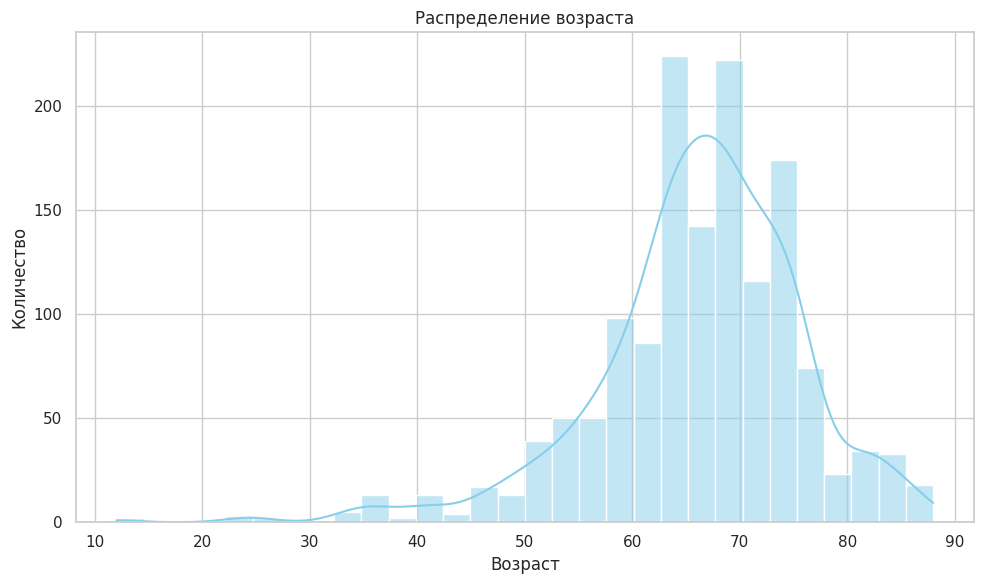

In [50]:
# Белый фон с сеткой
sns.set_style("whitegrid")

# Гистограмма распределения возраста (столбец 'age')
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color="skyblue")
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.tight_layout()

plt.show()




Для дальнейшей оценки кореляции и принятия решения о включении в датасет на базе занных о возрасте рассчитываются следующие статистические показатели  (можно использовать другие):

deviation_from_median: Отклонение возраста от медианного значения возраста в датасете. Если значение положительное, возраст выше медианы; если отрицательное — ниже медианы.

age_percentile: Процентное положение возраста относительно всех остальных возрастов в наборе данных. Он показывает, сколько процентов людей в датасете имеют возраст ниже данного значения.

age_quantile: Показатель делит возраста на четыре равные части (квартили). При этом значение 1 соответствует самому нижнему квартилю (25% самых молодых), а 4 — самому верхнему квартилю (25% самых старых).

age_density: Оценка плотности вероятности для каждого возраста в датасете показывает, насколько "обычным" или "редким" является определенный возраст среди всех возрастов в датасете.

age_zscore: Z-оценка для возраста показывает, на сколько стандартных отклонений конкретное значение возраста отклоняется от среднего значения возраста в ндатасете. Если Z-оценка положительна, возраст выше среднего, и наоборот.

In [51]:

import scipy.stats as stats

data['deviation_from_median'] = data['age'] - data['age'].median()

data['age_percentile'] = data['age'].apply(lambda x: stats.percentileofscore(data['age'], x))

data['age_quantile'] = pd.qcut(data['age'], q=4, labels=[1, 2, 3, 4])

data['age_density'] = data['age'].apply(lambda x: float(stats.gaussian_kde(data['age'])(x)))

mean_age = data['age'].mean() #средний возраст
std_age = data['age'].std() # стандартное отклонение
data['age_zscore'] = (data['age'] - mean_age) / std_age


In [52]:
data

,id,gender,age,dose,prev_INR(MHO),atrial_fibrillation,mitral_valve,aortal_valve,date_diff,INR(MHO),...,d5,d6,d7,d8,deviation_from_median,age_percentile,age_quantile,is_elderly,age_density,age_zscore
0,140361892057136,0,57,7.500,3.11,1,0,0,13,3.32,...,0,0,0,0,-10.0,13.658202,1,0,0.017912,-0.948458
1,140361892057136,0,57,7.500,3.32,1,0,0,15,2.01,...,0,0,0,0,-10.0,13.658202,1,0,0.017912,-0.948458
2,140361892057264,1,50,5.000,2.01,0,1,0,26,2.75,...,0,0,1,0,-17.0,5.525051,1,0,0.007271,-1.673105
3,140361892057392,0,53,6.250,1.42,1,0,0,15,2.56,...,0,0,0,0,-14.0,8.201784,1,0,0.010533,-1.362542
4,140361892057392,0,53,6.250,2.56,1,0,0,49,2.80,...,0,0,0,0,-14.0,8.201784,1,0,0.010533,-1.362542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,139766010360000,1,68,3.750,1.34,1,0,0,64,2.30,...,0,0,0,0,1.0,55.387783,3,0,0.049559,0.190274
1459,139766010360144,1,35,3.750,1.50,1,0,0,176,1.04,...,0,0,0,0,-32.0,1.029513,1,0,0.001983,-3.225922
1460,139766010360144,1,35,3.750,1.04,1,0,0,5,1.03,...,0,0,0,0,-32.0,1.029513,1,0,0.001983,-3.225922
1461,139766010360288,0,64,2.500,2.80,0,0,1,50,3.19,...,1,0,1,0,-3.0,34.831846,2,0,0.045676,-0.223810


# Корреляция признаков

In [26]:
# Удаляем столбцы которые, не влияют на дозу варфарина или переведены в иные числовые параметры
data.drop(['institution', 'institution_id','date_analyse', 'diagnos', 'sss', 'birthdate'], axis=1, inplace=True)


In [29]:
!pip install phik
import phik
from phik import resources, report

  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)


<ipython-input-38-97deae019bab>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5, annot=True, cmap='YlGnBu', fmt='.1g')


<Axes: >

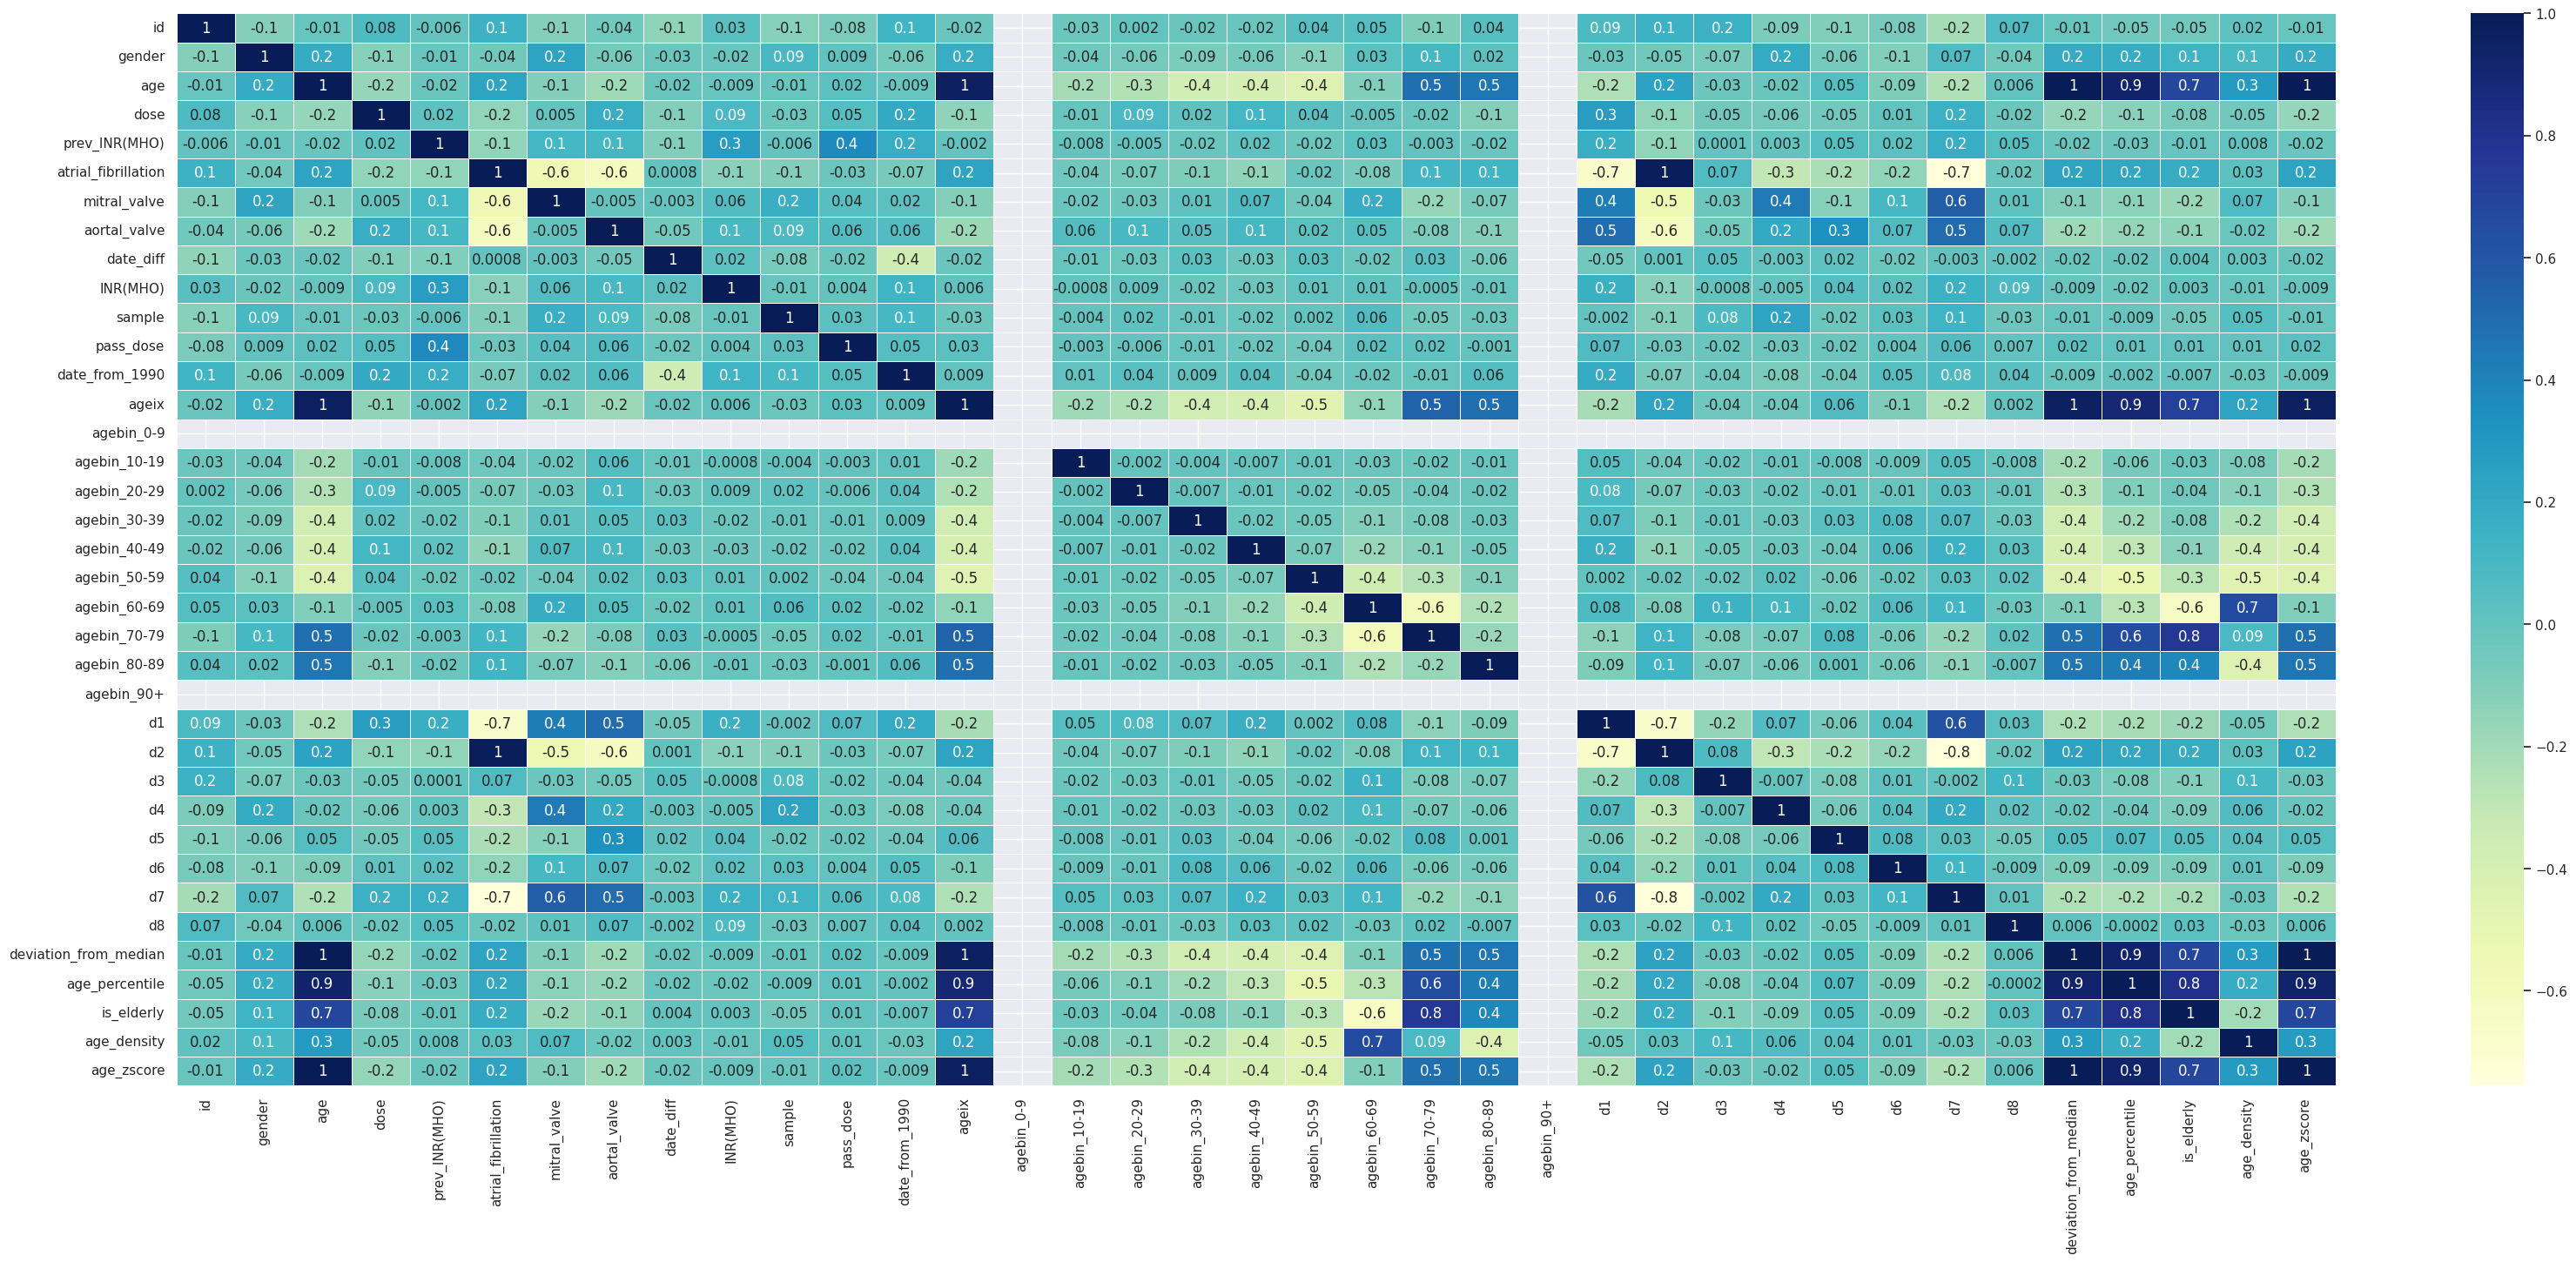

In [38]:
# тепловая карта на базе корреляции Пирсона - она для текущего датафрейма не показательна,
# поскольку в нем разный тип переменных - и категориальные и интервальные и относительные
sns.set(rc = {'figure.figsize':(40,16)})
#matrix = np.triu(data.corr())
sns.heatmap(data.corr(), linewidths=.5, annot=True, cmap='YlGnBu', fmt='.1g')

interval columns not set, guessing: ['id', 'gender', 'age', 'dose', 'prev_INR(MHO)', 'atrial_fibrillation', 'mitral_valve', 'aortal_valve', 'date_diff', 'INR(MHO)', 'sample', 'pass_dose', 'date_from_1990', 'ageix', 'agebin_10-19', 'agebin_20-29', 'agebin_30-39', 'agebin_40-49', 'agebin_50-59', 'agebin_60-69', 'agebin_70-79', 'agebin_80-89', 'd1', 'd4', 'd5', 'd7', 'deviation_from_median', 'age_percentile', 'age_density', 'age_zscore']


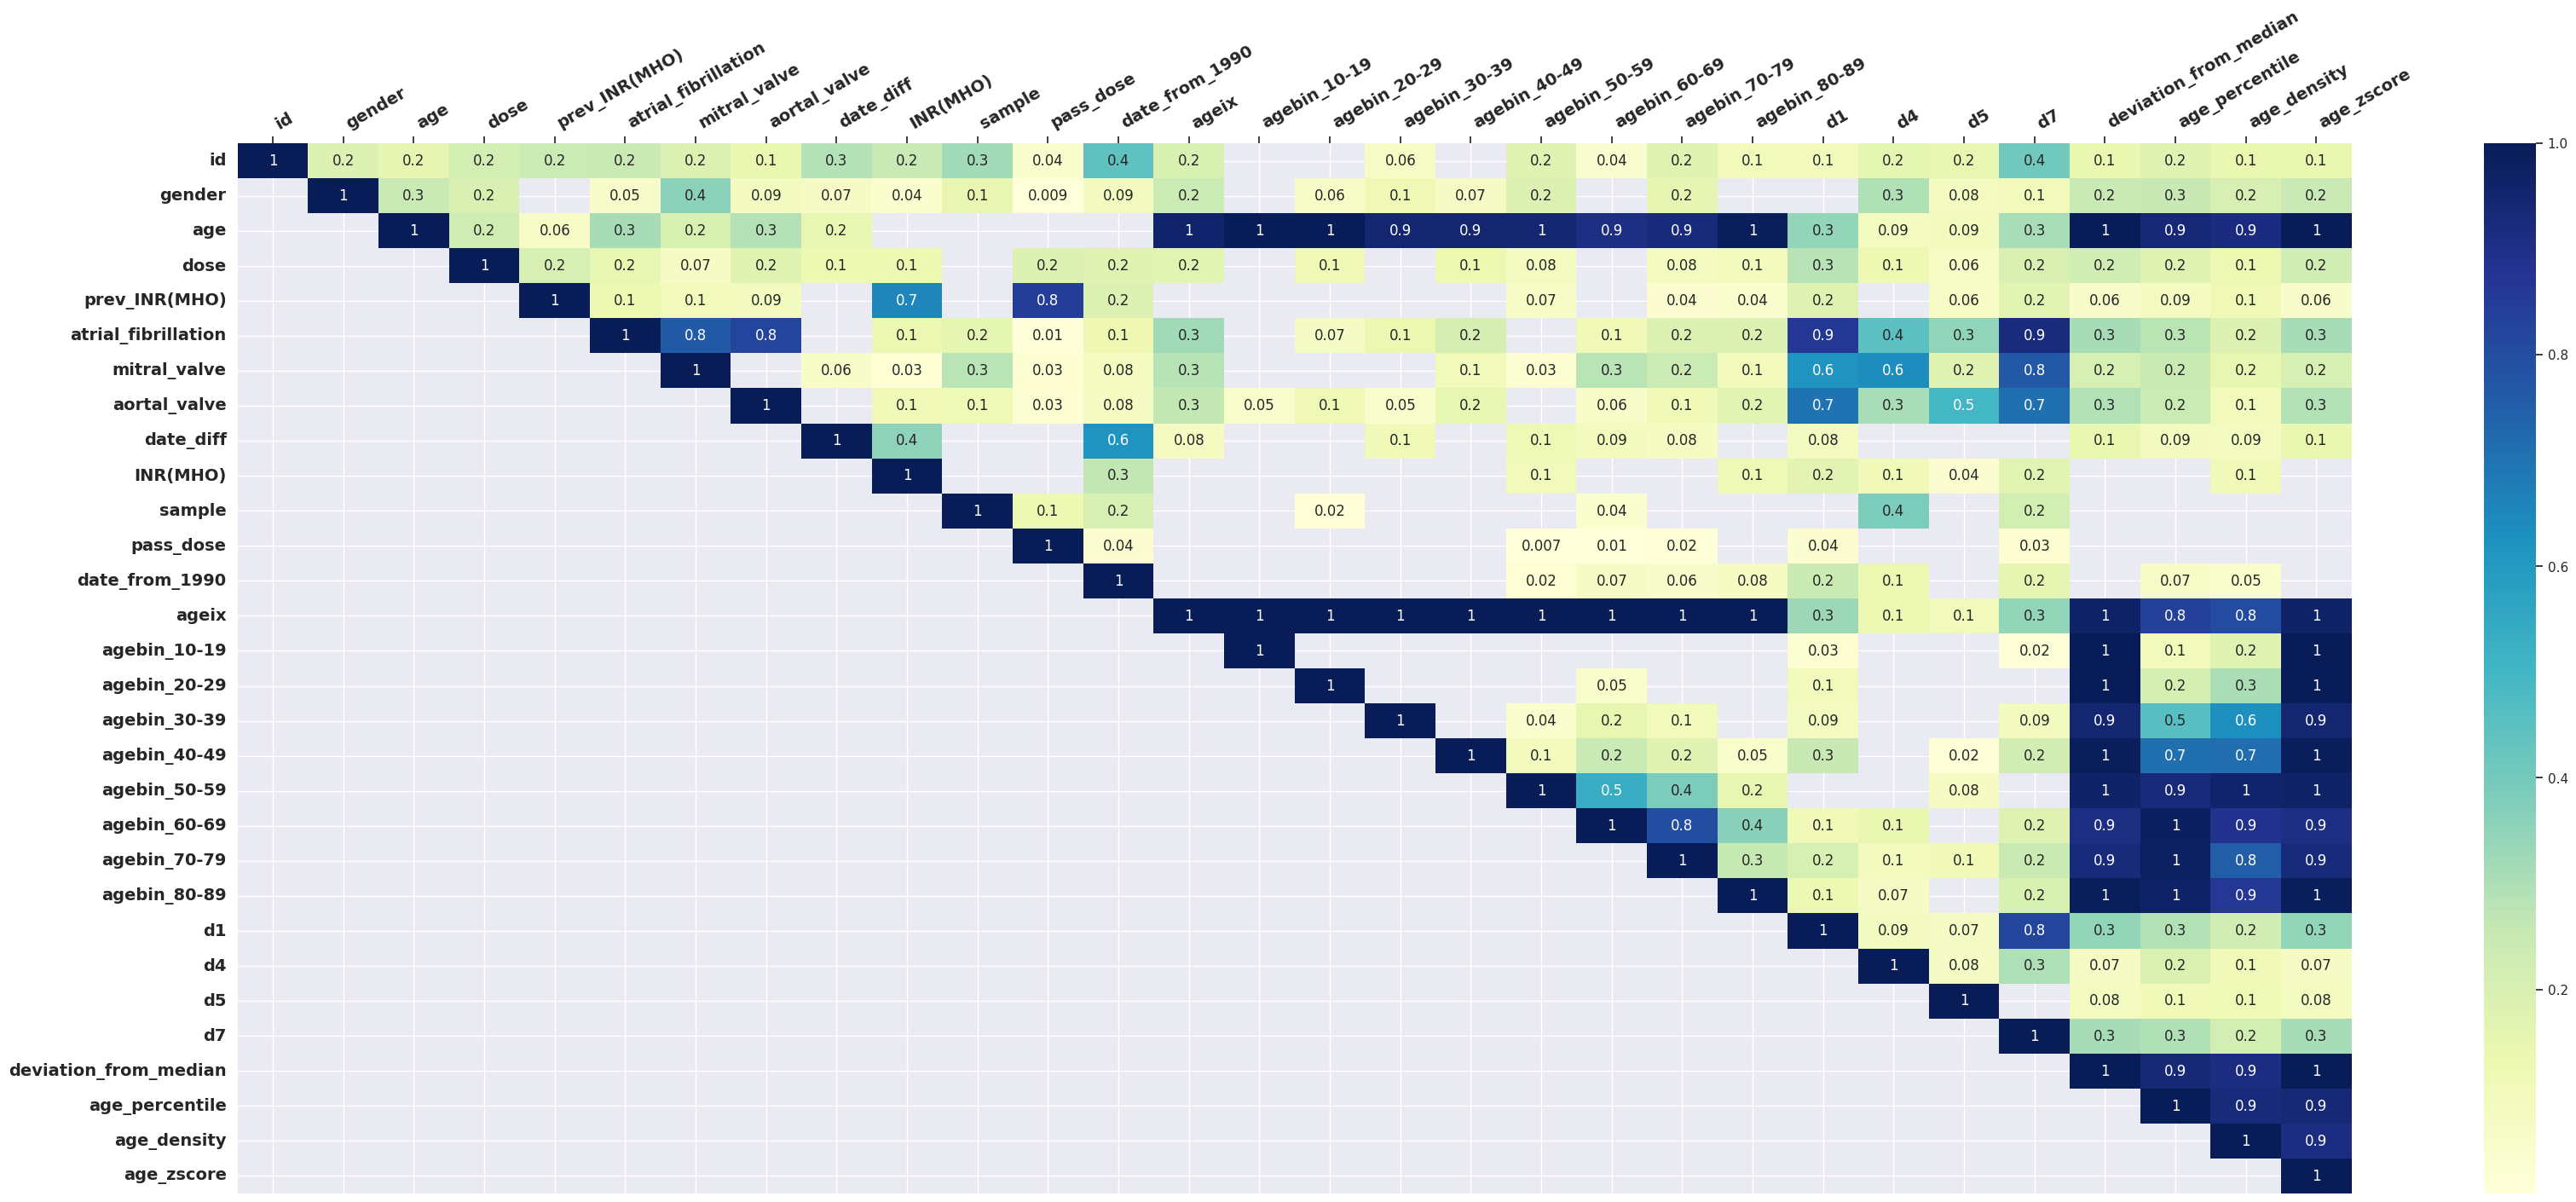

In [100]:
# визуализация - тепловая карта phi_k
# вычисляем матрицу корреляций на основе коэффициента phik, который предназначен для вычисления корреляций
# между категориальными, порядковыми и интервальными переменными.
matrix = np.triu(data.phik_matrix())


# Установка параметров для будущего графика
sns.set(rc = {'figure.figsize':(40,16)})

# Визуализация тепловой карты
ax = sns.heatmap(
    matrix,
    annot=True,               # показать значения корреляции в ячейках
    cmap='YlGnBu',            # цвета от желтого через зеленый к синему
    fmt='.1g',                # один знак после запятой
    mask=matrix == 0,         # нули не показываем
    xticklabels=data.columns,  # показать названия колонок на оси x
    yticklabels=data.columns  # показать названия колонок на оси y
)

# Перемещение меток колонок наверх для удобства
ax.xaxis.tick_top()
# Поворот меток для лучшего отображения и установка размера шрифта
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='left', fontsize="14", weight="bold")
ax.set_yticklabels(ax.get_yticklabels(), fontsize="14", weight="bold")

plt.show()


# Определениe наиболее релевантных признаков в датасете с использованием методов автоматизированного отбора признаков.

In [55]:
## Удаляем строки с пропущенными значениями
if data.isna().any().any():
    data.dropna(inplace=True)

# Подготовка данных
X = data.drop('dose', axis=1)
y = data['dose']

In [56]:
from sklearn.feature_selection import RFE, f_classif, mutual_info_regression, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import MinMaxScaler

# 1. RFE (Recursive Feature Elimination)
# RFE рекурсивно уменьшает количество признаков, оценивая модель на каждом этапе и выбирая либо лучший, либо худший признак.
estimator = LinearRegression()
selector = RFE(estimator)
selector = selector.fit(X, y)
rfe_features = pd.Series(selector.support_, index=X.columns).apply(lambda x: 1 if x else 0)

# 2. RandomForest
# Случайный лес оценивает важность признаков на основе того, насколько часто каждый признак используется для принятия решений в деревьях.
model_rf = RandomForestRegressor()
model_rf.fit(X, y)
rf_importances = pd.Series(model_rf.feature_importances_, index=X.columns)

# 3. Lasso
# Lasso (линейная регрессия с L1-регуляризацией) может свести вес некоторых признаков к нулю, тем самым исключая их.
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X, y)
lasso_coefficients = pd.Series(model_lasso.coef_, index=X.columns)

# 4. SFS (Sequential Feature Selector)
# SFS последовательно добавляет или удаляет признаки на основе их производительности до достижения заданного числа признаков.
sfs = SFS(LinearRegression(),
          k_features='best',
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)
sfs.fit(X, y)
sfs_features = pd.Series([1 if i in list(sfs.k_feature_idx_) else 0 for i in range(X.shape[1])], index=X.columns)

# 5. ANOVA
# ANOVA (дисперсионный анализ) проверяет, имеют ли две или более группы схожие средние значения. В контексте отбора признаков это может помочь определить,
# влияет ли признак на целевую переменную.
f_scores, _ = f_classif(X, y)
f_features = pd.Series(f_scores, index=X.columns)

# 6. Mutual Information
# Взаимная информация измеряет зависимость между признаком и целевой переменной; ближе к 0 - меньше зависимости, ближе к 1 - более сильная зависимость.
mi_scores = mutual_info_regression(X, y)
mi_features = pd.Series(mi_scores, index=X.columns)

# 7. RFECV (Recursive Feature Elimination with Cross-Validation)
# RFECV сочетает RFE с кросс-валидацией, чтобы выбрать оптимальное количество признаков.
selector = RFECV(estimator)
selector = selector.fit(X, y)
rfecv_features = pd.Series(selector.support_, index=X.columns).apply(lambda x: 1 if x else 0)

# Сводная таблица
feature_table = pd.DataFrame({
    'RFE': rfe_features,
    'RandomForest': rf_importances,
    'Lasso': lasso_coefficients,
    'SFS': sfs_features,
    'ANOVA': f_features,
    'Mutual Info': mi_features,
    'RFECV': rfecv_features
})

# Нормализация данных с весами
scaler = MinMaxScaler()
methods_with_weights = ['RandomForest', 'Lasso', 'ANOVA', 'Mutual Info']
feature_table[methods_with_weights] = scaler.fit_transform(feature_table[methods_with_weights])

# Расчет общей важности и создание рейтинга
feature_table['Total Importance'] = feature_table.sum(axis=1)
feature_ranking = feature_table.sort_values(by='Total Importance', ascending=False)

feature_ranking


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [13 22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,RFE,RandomForest,Lasso,SFS,ANOVA,Mutual Info,RFECV,Total Importance
d1,1,0.296698,1.000000,1,1.000000,0.291507,1,5.588205
age_density,1,0.382524,0.269988,1,0.124583,0.305669,1,4.082765
gender,1,0.140625,0.054967,1,0.456758,0.000000,1,3.652349
date_from_1990,0,0.662366,0.272497,1,0.444051,0.153992,1,3.532906
d5,1,0.009938,0.090154,1,0.193798,0.155681,1,3.449572
age,1,0.205494,0.246329,0,0.435697,0.479576,1,3.367097
agebin_80-89,1,0.011618,0.052099,1,0.196781,0.006062,1,3.266560
deviation_from_median,1,0.191336,0.269426,0,0.435697,0.367281,1,3.263740
age_zscore,1,0.186063,0.269988,0,0.435697,0.367587,1,3.259335
id,0,1.000000,0.269988,0,0.589397,1.000000,0,2.859386


# Очистка датасета от лишних признаков(параметров)

In [99]:
# на основании матрицы корреляции и автоматизированного отбора признаков можно предложить  показатели, которые можно удалить из датасета
# Предлагается удалить показатели из таблицы feature_ranking с рейтингом меньше 2, сохранив столбцы с начальными исходными данными из
# медицинских учереждений, такие как, например, age и date_diff

# Заданное значение рейтинга для удаления
rank = 2

# Признаки, которые нужно сохранить независимо от их рейтинга
vip_features = ['age', 'date_diff', 'aortal_valve','sample', 'atrial_fibrillation']

# Список признаков, которые нужно удалить
features_to_remove = feature_ranking[feature_ranking['Total Importance'] < rank].index.tolist()

# Исключение из этого списка важных признаков, которые оставляем
features_to_remove = [f for f in features_to_remove if f not in vip_features]

# Удаляем признаки из датасета
data = data.drop(columns=features_to_remove)


# Сохранение очищенного датасета

In [101]:

# сохраним результаты очищенного датасета в виртульное окружение - при необходимости сохраните на локальный диск вручную
data.to_excel('dataset_clear.xlsx', index=False)


# Опыты аугментации путем добавления строк. Моделирование и оценка различных регрессоров.

In [102]:
!pip install catboost

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor



def augment_data_by_id(data, columns_to_augment, n_augmentations):
    """
    Аугментация данных на основе идентификаторов пациентов.
    """

    augmented_data = [data]

    original_max_id = data['id'].max()

    for patient_id in data['id'].unique():
        patient_data = data[data['id'] == patient_id]

        for n in range(n_augmentations):
            temp_data = patient_data.copy()

            # Генерируем уникальное значение шума для этой копии записей
            noise_values = {col: np.random.normal(0, 0.5) for col in columns_to_augment}

            for col, noise_value in noise_values.items():
                temp_data[col] = temp_data[col].apply(lambda x: round(x + noise_value))

            # Обновляем ID
            new_id = original_max_id + (patient_id + 1) * (n + 1)
            temp_data['id'] = new_id

            # Добавляем аугментированные данные
            augmented_data.append(temp_data)

    # Объединяем все датафреймы из списка в один
    return pd.concat(augmented_data, axis=0).reset_index(drop=True)

def train_regressors(X_train, y_train):

    # Определение моделей
    regressors = {
        'XGBoost': xgb.XGBRegressor(objective ='reg:squarederror'),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Random Forest': RandomForestRegressor(),
        'KNeighbors': KNeighborsRegressor(),
        'Linear Regression': LinearRegression(),
        'LightGBM': LGBMRegressor(),
        'CatBoost': CatBoostRegressor(verbose=0)
    }

    trained_regressors = {}

    # Обучение моделей
    for name, regressor in regressors.items():
        regressor.fit(X_train, y_train)
        trained_regressors[name] = regressor

    return trained_regressors


def predict_with_trained_regressors(trained_regressors, X_new):
    predictions = {}

    # Предсказания с использованием обученных моделей
    for name, trained_model in trained_regressors.items():
        predictions[name] = trained_model.predict(X_new)

    return predictions


def compute_metrics(y_true, predictions):
    results = {}

    for name, y_pred in predictions.items():
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        mape = (abs((y_true - y_pred) / y_true).mean()) * 100
        mae = mean_absolute_error(y_true, y_pred)
        percent_deviation = (abs((y_true - y_pred) / y_true.mean()) * 100).mean()

        results[name] = [mse, r2, mape, mae, percent_deviation]

    return pd.DataFrame(results, index=['Mean Squared Error', 'R^2', 'MAPE', 'MAE', 'Average Percent Deviation']).T

from tabulate import tabulate

def display_results(y_train, y_test, predictions_train, predictions_test):
    metrics_train = compute_metrics(y_train, predictions_train)
    metrics_test = compute_metrics(y_test, predictions_test)

    print("===== Метрики на обучающих данных =====")
    print(tabulate(metrics_train, headers='keys', tablefmt='grid'))

    print("\n===== Метрики на тестовых данных =====")
    print(tabulate(metrics_test, headers='keys', tablefmt='grid'))

def stratified_split(df, stratify_column='id', test_size=0.2, random_state=None): # Функция разбиения датафрейма без деления данных одного пациента в разные выборки
    # Получаем уникальные значения
    unique_ids = df[stratify_column].unique()

    # Разделяем уникальные значения на train и test
    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=random_state)

    # Разделяем датафрейм на основе id
    train_df = df[df[stratify_column].isin(train_ids)]
    test_df = df[df[stratify_column].isin(test_ids)]

    return train_df, test_df



In [104]:
#  Подготовка данных. Загрузка оригинального датасета.
df = pd.read_excel('/content/dataset_clear.xlsx')

In [105]:
# ОПЫТ №1. Обучение без аугментации строк

# Разделение исходного датафрейма с использованием stratified_split
train_df, test_df = stratified_split(df, 'id', 0.2, 4)

# Извлечение X и y из train_df и test_df
X_train = train_df.drop('dose', axis=1)
y_train = train_df['dose']

X_test = test_df.drop('dose', axis=1)
y_test = test_df['dose']


# запускаем  обучение, расчет и вывод метрик

trained_regressors= train_regressors(X_train, y_train)

predictions_train = predict_with_trained_regressors(trained_regressors, X_train)
predictions_test = predict_with_trained_regressors(trained_regressors, X_test)

display_results(y_train, y_test, predictions_train, predictions_test)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 25
[LightGBM] [Info] Start training from score 3.614031
===== Метрики на обучающих данных =====
+-------------------+----------------------+-----------+----------+-----------+-----------------------------+
|                   |   Mean Squared Error |       R^2 |     MAPE |       MAE |   Average Percent Deviation |
+===================+======================+===========+==========+===========+=============================+
| XGBoost           |            0.0223082 |  0.99137  |  3.36402 | 0.0997241 |                     2.75936 |
+-------------------+----------------------+-----------+----------+-----------+-----------------------------+
| 

In [106]:
# ОПЫТ№2 Аугментация всего датафрейма.

# Аугментируем весь датафрейм добавляя n_augmentations копий каждого пациента с добавлением шума в возраст
combined_data_all = augment_data_by_id(df, ['age'], n_augmentations=10)

# Разделение аугментированного датафрейма с использованием stratified_split
train_aug_all, test_aug_all = stratified_split(combined_data_all, 'id', 0.2, 4)


# Извлечение X и y
X_train2 = train_aug_all.drop('dose', axis=1)
y_train2 = train_aug_all['dose']

X_test2 = test_aug_all.drop('dose', axis=1)
y_test2 = test_aug_all['dose']


# запускаем  обучение, расчет и вывод метрик

trained_regressors2= train_regressors(X_train2, y_train2)

predictions_train2 = predict_with_trained_regressors(trained_regressors2, X_train2)
predictions_test2 = predict_with_trained_regressors(trained_regressors2, X_test2)

display_results(y_train2, y_test2, predictions_train2, predictions_test2)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 12846, number of used features: 29
[LightGBM] [Info] Start training from score 3.610900
===== Метрики на обучающих данных =====
+-------------------+----------------------+-----------+------------+----------+-----------------------------+
|                   |   Mean Squared Error |       R^2 |       MAPE |      MAE |   Average Percent Deviation |
+===================+======================+===========+============+==========+=============================+
| XGBoost           |          0.0493814   |  0.980394 |  5.39757   | 0.158089 |                   4.37811   |
+-------------------+----------------------+-----------+------------+----------+-----------------------------+
| Gradient Boosting |          1.55978     |  0.380703 | 36.

In [107]:
#ОЫТ№3 Аугментация только обучающей выборки из ОПЫТА№1, тестовая выборка не аугментируется

# Аугментируем тренировочные данные train_df добавляя n_augmentations копий каждого пациента с добавлением шума в возраст

combined_data_train_only = augment_data_by_id(train_df, ['age'], n_augmentations=10)


# Извлечение X и y из combined_data2 и test_df
X_train3 = combined_data_train_only.drop('dose', axis=1)
y_train3 = combined_data_train_only['dose']

X_test3 = test_df.drop('dose', axis=1)
y_test3 = test_df['dose']




# запускаем  обучение, расчет и вывод метрик

trained_regressors3 = train_regressors(X_train3, y_train3)

predictions_train3 = predict_with_trained_regressors(trained_regressors3, X_train3)
predictions_test3 = predict_with_trained_regressors(trained_regressors3, X_test3)

display_results(y_train3, y_test3, predictions_train3, predictions_test3)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 12661, number of used features: 28
[LightGBM] [Info] Start training from score 3.614031
===== Метрики на обучающих данных =====
+-------------------+----------------------+-----------+------------+------------+-----------------------------+
|                   |   Mean Squared Error |       R^2 |       MAPE |        MAE |   Average Percent Deviation |
+===================+======================+===========+============+============+=============================+
| XGBoost           |          0.0134738   |  0.994787 |  2.79979   | 0.0823054  |                   2.27738   |
+-------------------+----------------------+-----------+------------+------------+-----------------

Вывод из опытов:
При аугментации всего датафрейма с последующим разбиением на обучающую и тестовую выборки (ОПЫТ №2) происходит утечка информации. В обучающую выборку попадают клоны пациентов из тестовой выборки и модель их легко "узнает" при проверке.
В ОПЫТе №3 тестовая выборка сохраняет свою уникальность и при проверке обученной на аугментированных обучающих данных модели показывает, что модель так же плохо прогнозирует дозу варфарина как и в ОПЫТе №1 без аугментации.

Таким образом, предложенный алгоритм аугментации не дает положительного эффекта при обучении модели
